# Kaggle Project Day 1

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
print(os.getcwd())
filename = '/Users/dongjingwen/Desktop/KaggleProject/data-sales/sales_train.csv'

### Load data from csv file into pandas dataframe

In [21]:
df_sales_train = pd.read_csv(filename,engine='python')
df_sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


## Show outliers on plots

### Create catterplot and label outliers

<ipython-input-128-8badd35f9596>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ax1.text(20,1100,'outlier: '+str(df_sales_train['item_cnt_day'][df_sales_train[df_sales_train['item_cnt_day']>900][df_sales_train['item_cnt_day']<1500].index[0]]))


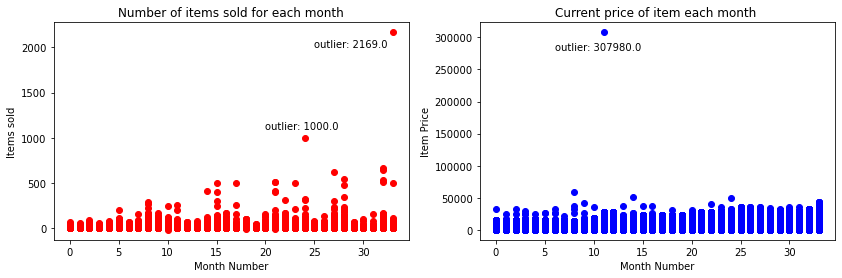

In [128]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(14,4))

ax1.scatter(df_sales_train['date_block_num'],df_sales_train['item_cnt_day'],color='red')
ax1.set_xlabel('Month Number')
ax1.set_ylabel('Items sold')
ax1.set_title('Number of items sold for each month')
ax1.text(20,1100,'outlier: '+str(df_sales_train['item_cnt_day'][df_sales_train[df_sales_train['item_cnt_day']>900][df_sales_train['item_cnt_day']<1500].index[0]]))
ax1.text(25,2000,'outlier: '+str(df_sales_train['item_cnt_day'][df_sales_train[df_sales_train['item_cnt_day']>1800].index[0]]))

ax2.scatter(df_sales_train['date_block_num'],df_sales_train['item_price'],color='blue')
ax2.set_xlabel('Month Number')
ax2.set_ylabel('Item Price')
ax2.set_title('Current price of item each month ')
ax2.text(6,280000,'outlier: '+str(df_sales_train['item_price'][df_sales_train[df_sales_train['item_price']>250000].index[0]]))

plt.show()

### Identify outliers on boxplot

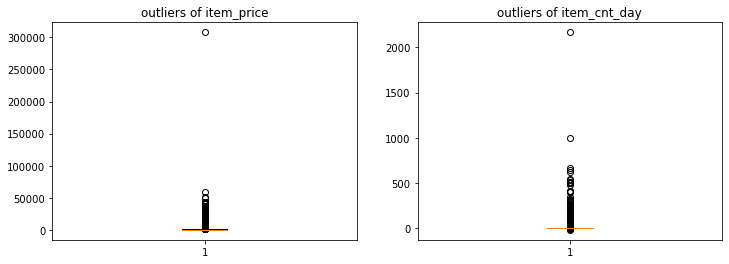

In [121]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,4))

ax1.boxplot(df_sales_train['item_price'])
ax1.set_title('outliers of item_price')
ax2.boxplot(df_sales_train['item_cnt_day'])
ax2.set_title('outliers of item_cnt_day')
plt.show()

## Aggregate sales_train from monthly to daily level

In [194]:
df_daily=df_sales_train.groupby(['date_block_num','item_id','shop_id','item_price'])['item_cnt_day'].sum().reset_index()
df_daily.sort_values(by=['date_block_num','item_id','shop_id','item_price']).head()

,date_block_num,item_id,shop_id,item_price,item_cnt_day
0,0,19,25,28.0,1.0
1,0,27,1,1890.0,1.0
2,0,27,2,2499.0,1.0
3,0,27,10,1890.0,1.0
4,0,27,19,2499.0,1.0


In [195]:
df_daily.to_csv('sales_train_daily.csv')